#CHE1148

###Data Reconciliation - Assignment 1


Student name: Ashutosh Desai

Student number: 1004774041

In [ ]:
#Import the converted csv file from Github
import pandas as pd
import numpy as np
link = 'https://raw.githubusercontent.com/ashutoshdesai/processdata1/main/Data4T_expt_i.csv'
df = pd.read_csv(link)
df

,Time (Sec.),Cold (Volts),Hot (Volts),Total (Volts),T1 (Deg C),T2 (Deg C),T4 (Deg C),T5 (Deg C)
0,46,2.77,2.98,2.80,18.55,46.87,40.89,33.09
1,48,2.78,2.97,2.85,18.36,47.06,41.43,32.73
2,50,2.78,3.02,2.82,18.55,46.87,39.80,33.64
3,52,2.83,2.91,2.79,18.55,46.87,39.80,33.09
4,54,2.80,3.01,2.97,18.36,47.06,41.07,33.27
...,...,...,...,...,...,...,...,...
2985,6016,2.46,2.97,2.92,18.36,50.14,41.43,34.91
2986,6018,2.46,2.93,1.54,17.99,49.78,41.98,33.82
2987,6020,2.45,2.91,2.79,18.17,49.59,42.70,35.45
2988,6022,2.46,2.92,2.93,18.36,49.59,41.61,34.00


MASS BALANCE SECTION

a) Converting the flow data from volts (as given in the data file) to kg/h using the calibration equations given in the question sheet.

In [ ]:
#df['Cold (Volts)']

In [ ]:
cold_volts = np.array(df['Cold (Volts)'])
hot_volts = np.array(df['Hot (Volts)'])
total_volts = np.array(df['Total (Volts)'])
print(cold_volts)
print(hot_volts)
print(total_volts)

[2.77 2.78 2.78 ... 2.45 2.46 2.49]
[2.98 2.97 3.02 ... 2.91 2.92 2.9 ]
[2.8  2.85 2.82 ... 2.79 2.93 2.92]


In [ ]:
#The converted flowrates are stored as arrays and printed
m_cw = 1.256 + (178.032 * np.sqrt(cold_volts))
m_hw = 1.444 + (181.574 * np.sqrt(hot_volts))
m_t = -2.319 + (355.822 * np.sqrt(total_volts))
print(m_cw)
print(m_hw)
print(m_t)

[297.56030081 298.09466427 298.09466427 ... 279.92015792 280.48828116
 282.18575747]
[314.88932231 314.36296539 316.98596991 ... 311.18604083 311.71778721
 310.65338   ]
[593.08508792 598.37767279 595.20774738 ... 592.02091533 606.75015564
 605.70990013]


In [ ]:
df['Cold water flowrate (Mcw) (kg/h)'] = m_cw
df['Hot water flowrate (Mhw) (kg/h)'] = m_hw
df['Total water flowrate (Mt) (kg/h)'] = m_t
print(df)


      Time (Sec.)  ...  Total water flowrate (Mt) (kg/h)
0              46  ...                        593.085088
1              48  ...                        598.377673
2              50  ...                        595.207747
3              52  ...                        592.020915
4              54  ...                        610.893531
...           ...  ...                               ...
2985         6016  ...                        605.709900
2986         6018  ...                        439.244490
2987         6020  ...                        592.020915
2988         6022  ...                        606.750156
2989         6024  ...                        605.709900

[2990 rows x 11 columns]


Here, this dataframe contains the updated columns of the converted flowrates.

b) 

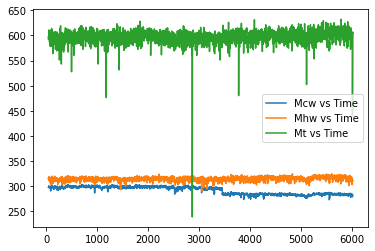

In [ ]:
from matplotlib import pyplot as plt
plt.plot(df['Time (Sec.)'],df['Cold water flowrate (Mcw) (kg/h)'], label='Mcw vs Time')
plt.plot(df['Time (Sec.)'],df['Hot water flowrate (Mhw) (kg/h)'], label='Mhw vs Time')
plt.plot(df['Time (Sec.)'],df['Total water flowrate (Mt) (kg/h)'], label='Mt vs Time')
plt.legend()


Plot of the flow rate data (each of the three flowrates) in units of kg/h versus time.

In [ ]:
#results without the split
std_Mcw = np.std(m_cw)
std_Mhw = np.std(m_hw)
std_Mt = np.std(m_t)
mean_Mcw = np.mean(m_cw)
mean_Mhw = np.mean(m_hw)
mean_Mt = np.mean(m_t)
print('These results are WITHOUT the split of the data')
print(std_Mcw,std_Mhw,std_Mt)
print(std_Mcw**2,std_Mhw**2,std_Mt**2)
print(mean_Mcw,mean_Mhw,mean_Mt)

These results are WITHOUT the split of the data
7.4664647941173286 3.7711999221010917 13.269019543575432
55.74809652179352 14.221948852455279 176.06687964778675
291.71634208316544 315.1414525084316 597.4895942763908


In [ ]:
#results with the split - segment 1
df1 = df.iloc[:1708]
#df1
std_M1cw = np.std(df1['Cold water flowrate (Mcw) (kg/h)'])
std_M1hw = np.std(df1['Hot water flowrate (Mhw) (kg/h)'])
std_M1t = np.std(df1['Total water flowrate (Mt) (kg/h)'])
mean_M1cw = np.mean(df1['Cold water flowrate (Mcw) (kg/h)'])
mean_M1hw = np.mean(df1['Hot water flowrate (Mhw) (kg/h)'])
mean_M1t = np.mean(df1['Total water flowrate (Mt) (kg/h)'])

print('The results for 1st split cold water flowrate (segment 1), mean = %.2f and variance = %.2f'%(mean_M1cw,std_M1cw**2))
print('The results for 1st split hot water flowrate (segment 1), mean = %.2f and variance = %.2f'%(mean_M1hw,std_M1hw**2))
print('The results for 1st split total water flowrate (segment 1), mean = %.2f and variance = %.2f'%(mean_M1t,std_M1t**2))


The results for 1st split cold water flowrate (segment 1), mean = 297.86 and variance = 6.00
The results for 1st split hot water flowrate (segment 1), mean = 314.27 and variance = 12.69
The results for 1st split total water flowrate (segment 1), mean = 595.51 and variance = 190.20


The segmenting of data is done visually from the plot. 

Segment 1 = 1708 rows

The mean and variance results are shown above for segment 1

In [ ]:
#results with the split - segment 2
df2 = df.iloc[1708:]
#df2
std_M2cw = np.std(df2['Cold water flowrate (Mcw) (kg/h)'])
std_M2hw = np.std(df2['Hot water flowrate (Mhw) (kg/h)'])
std_M2t = np.std(df2['Total water flowrate (Mt) (kg/h)'])
mean_M2cw = np.mean(df2['Cold water flowrate (Mcw) (kg/h)'])
mean_M2hw = np.mean(df2['Hot water flowrate (Mhw) (kg/h)'])
mean_M2t = np.mean(df2['Total water flowrate (Mt) (kg/h)'])

print('The results for 2nd split cold water flowrate (segment 2), mean = %.2f and variance = %.2f'%(mean_M2cw,std_M2cw**2))
print('The results for 2nd split hot water flowrate (segment 2), mean = %.2f and variance = %.2f'%(mean_M2hw,std_M2hw**2))
print('The results for 2nd split total water flowrate (segment 2), mean = %.2f and variance = %.2f'%(mean_M2t,std_M2t**2))


The results for 2nd split cold water flowrate (segment 2), mean = 283.52 and variance = 4.57
The results for 2nd split hot water flowrate (segment 2), mean = 316.30 and variance = 13.93
The results for 2nd split total water flowrate (segment 2), mean = 600.12 and variance = 145.13


The segmenting of data is done visually from the plot. 

Segment 2 = 1282 rows

The mean and variance results are shown above for segment 2

c)

In [ ]:
#Removing outliners from segment 1
#Cold water flowrate 1
m1_cw = df1['Cold water flowrate (Mcw) (kg/h)']
#m1_cw
m1_cw_ext1 = mean_M1cw + (3*std_M1cw)
m1_cw_ext2 = mean_M1cw - (3*std_M1cw)
#print(m1_cw_ext1)
#print(m1_cw_ext2)
m1_cw_clean = []
m1_cw_out = []

for i in m1_cw:
  if i>m1_cw_ext1:
    m1_cw_out.append(i)
    m1_cw_clean.append(mean_M1cw)
  elif i<m1_cw_ext2:
    m1_cw_out.append(i)
    m1_cw_clean.append(mean_M1cw)
  else:
    m1_cw_clean.append(i)

m1_cw_clean = np.array(m1_cw_clean)
m1_cw_out = np.array(m1_cw_out)
print('The number of outliers for the cold water flowrate (segment 1) = %i'%m1_cw_out.shape[0])

#Hot water flowrate 1
m1_hw = df1['Hot water flowrate (Mhw) (kg/h)']
#m1_hw
m1_hw_ext1 = mean_M1hw + (3*std_M1hw)
m1_hw_ext2 = mean_M1hw - (3*std_M1hw)
#print(m1_hw_ext1)
#print(m1_hw_ext2)
m1_hw_clean = []
m1_hw_out = []

for i in m1_hw:
  if i>m1_hw_ext1:
    m1_hw_out.append(i)
    m1_hw_clean.append(mean_M1hw)
  elif i<m1_hw_ext2:
    m1_hw_out.append(i)
    m1_hw_clean.append(mean_M1hw)
  else:
    m1_hw_clean.append(i)

m1_hw_clean = np.array(m1_hw_clean)
m1_hw_out = np.array(m1_hw_out)
print('The number of outliers for the hot water flowrate (segment 1) = %i'%m1_hw_out.shape[0])

#Total flowrate 1
m1_t = df1['Total water flowrate (Mt) (kg/h)']
#m1_t
m1_t_ext1 = mean_M1t + (3*std_M1t)
m1_t_ext2 = mean_M1t - (3*std_M1t)
#print(m1_t_ext1)
#print(m1_t_ext2)
m1_t_clean = []
m1_t_out = []

for i in m1_t:
  if i>m1_t_ext1:
    m1_t_out.append(i)
    m1_t_clean.append(mean_M1t)
  elif i<m1_t_ext2:
    m1_t_out.append(i)
    m1_t_clean.append(mean_M1t)
  else:
    m1_t_clean.append(i)

m1_t_clean = np.array(m1_t_clean)
m1_t_out = np.array(m1_t_out)
print('The number of outliers for the total water flowrate (segment 1) = %i'%m1_t_out.shape[0])


The number of outliers for the cold water flowrate (segment 1) = 26
The number of outliers for the hot water flowrate (segment 1) = 15
The number of outliers for the total water flowrate (segment 1) = 8


The code above removes the outliers from segment 1 data and also gives the number of outliers present for each parameter.


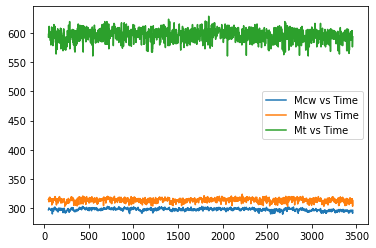

In [ ]:
#plot for 1st segment 
plt.plot(df1['Time (Sec.)'],m1_cw_clean, label='Mcw vs Time')
plt.plot(df1['Time (Sec.)'],m1_hw_clean, label='Mhw vs Time')
plt.plot(df1['Time (Sec.)'],m1_t_clean, label='Mt vs Time')
plt.legend()


Segment 1 plot after removing the outliers

In [ ]:
#Removing outliners from segment 2
#Cold water flowrate 2
m2_cw = df2['Cold water flowrate (Mcw) (kg/h)']
#m2_cw
m2_cw_ext1 = mean_M2cw + (3*std_M2cw)
m2_cw_ext2 = mean_M2cw - (3*std_M2cw)
#print(m2_cw_ext1)
#print(m2_cw_ext2)
m2_cw_clean = []
m2_cw_out = []

for i in m2_cw:
  if i>m2_cw_ext1:
    m2_cw_out.append(i)
    m2_cw_clean.append(mean_M2cw)
  elif i<m2_cw_ext2:
    m2_cw_out.append(i)
    m2_cw_clean.append(mean_M2cw)
  else:
    m2_cw_clean.append(i)

m2_cw_clean = np.array(m2_cw_clean)
m2_cw_out = np.array(m2_cw_out)
print('The number of outliers for the cold water flowrate (segment 2) = %i'%m2_cw_out.shape[0])

#Hot water flowrate 2
m2_hw = df2['Hot water flowrate (Mhw) (kg/h)']
#m2_hw
m2_hw_ext1 = mean_M2hw + (3*std_M2hw)
m2_hw_ext2 = mean_M2hw - (3*std_M2hw)
#print(m2_hw_ext1)
#print(m2_hw_ext2)
m2_hw_clean = []
m2_hw_out = []

for i in m2_hw:
  if i>m2_hw_ext1:
    m2_hw_out.append(i)
    m2_hw_clean.append(mean_M2hw)
  elif i<m2_hw_ext2:
    m2_hw_out.append(i)
    m2_hw_clean.append(mean_M2hw)
  else:
    m2_hw_clean.append(i)

m2_hw_clean = np.array(m2_hw_clean)
m2_hw_out = np.array(m2_hw_out)
print('The number of outliers for the hot water flowrate (segment 2) = %i'%m2_hw_out.shape[0])

#Total flowrate 2
m2_t = df2['Total water flowrate (Mt) (kg/h)']
#m2_t
m2_t_ext1 = mean_M2t + (3*std_M2t)
m2_t_ext2 = mean_M2t - (3*std_M2t)
#print(m2_t_ext1)
#print(m2_t_ext2)
m2_t_clean = []
m2_t_out = []

for i in m2_t:
  if i>m2_t_ext1:
    m2_t_out.append(i)
    m2_t_clean.append(mean_M2t)
  elif i<m2_t_ext2:
    m2_t_out.append(i)
    m2_t_clean.append(mean_M2t)
  else:
    m2_t_clean.append(i)

m2_t_clean = np.array(m2_t_clean)
m2_t_out = np.array(m2_t_out)
print('The number of outliers for the total water flowrate (segment 2) = %i'%m2_t_out.shape[0])

The number of outliers for the cold water flowrate (segment 2) = 25
The number of outliers for the hot water flowrate (segment 2) = 9
The number of outliers for the total water flowrate (segment 2) = 5


The code above removes the outliers from segment 1 data and also gives the number of outliers present for each parameter.

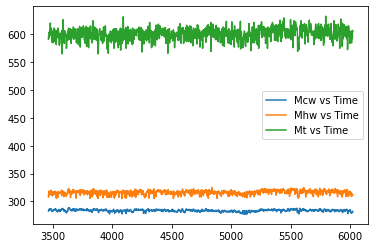

In [ ]:
#plot for 2nd segment 
plt.plot(df2['Time (Sec.)'],m2_cw_clean, label='Mcw vs Time')
plt.plot(df2['Time (Sec.)'],m2_hw_clean, label='Mhw vs Time')
plt.plot(df2['Time (Sec.)'],m2_t_clean, label='Mt vs Time')
plt.legend()

Segment 2 plot after removing the outliers

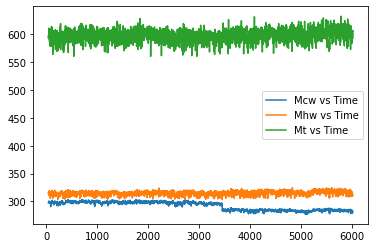

In [ ]:
#Make a copy of the dataframe
Df = df.copy()

#Merge the fresh data
M_CW = np.concatenate((m1_cw_clean,m2_cw_clean),axis=0)
M_HW = np.concatenate((m1_hw_clean,m2_hw_clean),axis=0)
M_T = np.concatenate((m1_t_clean,m2_t_clean),axis=0)

Df['Cold water flowrate (Mcw) (kg/h)'] = M_CW
Df['Hot water flowrate (Mhw) (kg/h)'] = M_HW
Df['Total water flowrate (Mt) (kg/h)'] = M_T

plt.plot(Df['Time (Sec.)'],Df['Cold water flowrate (Mcw) (kg/h)'], label='Mcw vs Time')
plt.plot(Df['Time (Sec.)'],Df['Hot water flowrate (Mhw) (kg/h)'], label='Mhw vs Time')
plt.plot(Df['Time (Sec.)'],Df['Total water flowrate (Mt) (kg/h)'], label='Mt vs Time')
plt.legend()


This plot is of the cleaned flowrate data vs time.

d)

In [ ]:
#Computing the mass balance closure errors
e1 = m1_t_clean - m1_hw_clean - m1_cw_clean
e2 = m2_t_clean - m2_hw_clean - m2_cw_clean
#print(e1)
#print(e2)

The results for mass balance closure error (segment 1), mean = -16.43 and variance = 90.80


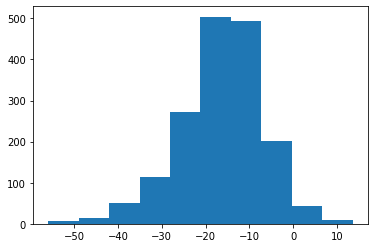

In [ ]:
plt.hist(e1)
std_e1 = np.std(e1)
var_e1 = std_e1**2
mean_e1 = np.mean(e1)
print('The results for mass balance closure error (segment 1), mean = %.2f and variance = %.2f'%(mean_e1,var_e1))

The results for mass balance closure error (segment 2), mean = 0.42 and variance = 95.08


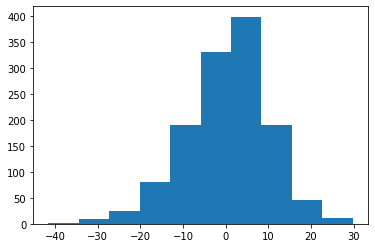

In [ ]:
plt.hist(e2)
std_e2 = np.std(e2)
var_e2 = std_e2**2
mean_e2 = np.mean(e2)
print('The results for mass balance closure error (segment 2), mean = %.2f and variance = %.2f'%(mean_e2,var_e2))

The mass balance closure error (e2), which is computed from the 'segment 2' data set gives a reasonably 'close-to-zero' result. The cold water flowrate experiences a sudden drop in the measurement from 297 to 283. The dropped value turns out to be closest to the correct value. Thus, the cold water flowrate sensor is inconsistent.

e)

ENERGY BALANCE SECTION

(1282,)
(1282,)
(1282,)
(1282,)
(1282,)


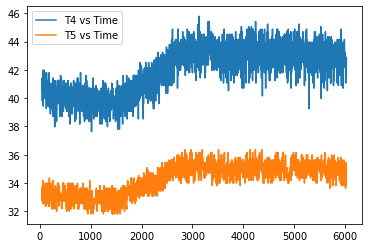

In [ ]:
#plot T4 and T5 vs time
plt.plot(Df['Time (Sec.)'],Df['T4 (Deg C)'], label='T4 vs Time')
plt.plot(Df['Time (Sec.)'],Df['T5 (Deg C)'], label='T5 vs Time')
plt.legend()

t1_seg = Df['T1 (Deg C)'][1708:]
t2_seg = Df['T2 (Deg C)'][1708:]
t4_seg = Df['T4 (Deg C)'][1708:]
t5_seg = Df['T5 (Deg C)'][1708:]
time_seg = Df['Time (Sec.)'][1708:]
print(t1_seg.shape)
print(t2_seg.shape)
print(t4_seg.shape)
print(t5_seg.shape)
print(time_seg.shape)

Visualization of the plot leads to the decision that from now on, data from row 1708 to 2990 shall be considered as it is stationary data.

The mean for T4 = 43.06 & the variance = 0.77
The mean for T5 = 35.03 & the variance = 0.24


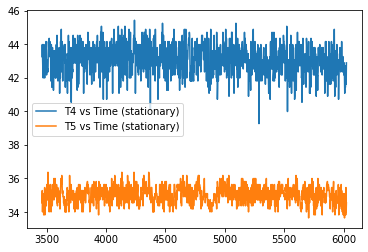

In [ ]:
#plot stationary t4 and t5 data
plt.plot(time_seg,t4_seg, label='T4 vs Time (stationary)')
plt.plot(time_seg,t5_seg, label='T5 vs Time (stationary)')
plt.legend()

std_t4 = np.std(t4_seg)
var_t4 = std_t4**2
mean_t4 = np.mean(t4_seg)
print('The mean for T4 = %.2f & the variance = %.2f'%(mean_t4,var_t4))

std_t5 = np.std(t5_seg)
var_t5 = std_t5**2
mean_t5 = np.mean(t5_seg)
print('The mean for T5 = %.2f & the variance = %.2f'%(mean_t5,var_t5))


The variance for T4 is greater than T5 because T4 sensor is close to the mixing joint of the hot and cold streams. The thermodynamic activity leads to such a variation whereas the T5 sensor is placed in a position where the mixed stream stabilizes a bit.

f) We go ahead with the clean data of segment 2 for the flowrates from row number 1708 to 2990

h)

In [ ]:
#Cancelling the heat capacities from the energy balance equations. Hence, e3(closure error) = T4-T5 [assumption]
#Computing the e3 closure error
e3 = t4_seg - t5_seg
print(e3)

1708    8.71
1709    8.70
1710    9.43
1711    7.98
1712    9.06
        ... 
2985    6.52
2986    8.16
2987    7.25
2988    7.61
2989    8.34
Length: 1282, dtype: float64


i)

The results for e3 closure error , mean = 8.04 and variance = 0.92


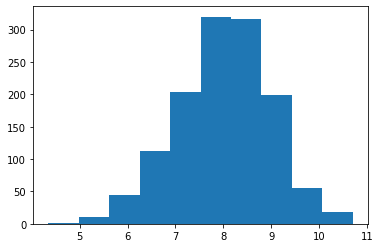

In [ ]:
plt.hist(e3)
std_e3 = np.std(e3)
var_e3 = std_e3**2
mean_e3 = np.mean(e3)
print('The results for e3 closure error , mean = %.2f and variance = %.2f'%(mean_e3,var_e3))

Yes, there is a gross error with either the T4 temperature sensor or the T5 temperature sensor

j) 1)

In [ ]:
#Computing energy balance closure errors for T4 and T5
#The Cp will be ignored as it doesn't change significantly for the range of temperatures of water we are dealing with.

e4 = (m2_cw_clean*t1_seg) + (m2_hw_clean*t2_seg) - (m2_t_clean*t4_seg) #considering t4
e5 = (m2_cw_clean*t1_seg) + (m2_hw_clean*t2_seg) - (m2_t_clean*t5_seg) #considering t5

The results for e4 closure error , mean = -4734.26 and variance = 459952.79


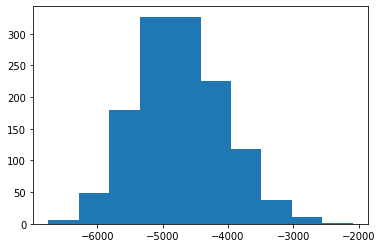

In [ ]:
#Computing the e4 closure error

plt.hist(e4)
std_e4 = np.std(e4)
var_e4 = std_e4**2
mean_e4 = np.mean(e4)
print('The results for e4 closure error , mean = %.2f and variance = %.2f'%(mean_e4,var_e4))

The results for e5 closure error , mean = 92.21 and variance = 202743.27


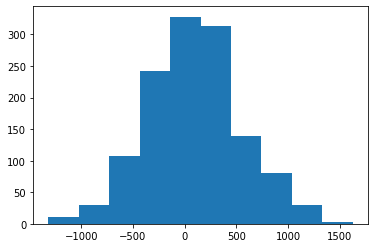

In [ ]:
#Computing the e5 closure error

plt.hist(e5)
std_e5 = np.std(e5)
var_e5 = std_e5**2
mean_e5 = np.mean(e5)
print('The results for e5 closure error , mean = %.2f and variance = %.2f'%(mean_e5,var_e5))

j) 2)

The e5 closure error, which is the closure error for T5 temperature sensor, gives the most reasonable closure error.
Based on the mean and variance results, the T4 temperature sensor is most likely to contain a gross error.